# Crimes in Madrid: Analysing differents types of crimes in Madrid Districts

The origin of this information is given by Madrid Town Hall Police, from 2014 to 2018.
Informs are getting from the web: 
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=bffff1d2a9fdb410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

The data have been treated in R in orden to have an unique inform with all the information in one csv file.

We will discover if there is any relation between the different kind of crimes, get some information related to them, and the environment of the Crimes...

There are 5 types of Crime as we will get in the analysis:

    1) Related to people (RELACIONADAS_CON_LAS_PERSONAS)
    2) Related to patrimony (RELACIONADAS_CON_EL_PATRIMONIO)
    3) Related to weapons (POR_TENENCIA_DE_ARMAS)
    4) Related to drugs (having drugs illegally) (POR_TENENCIA_DE_DROGAS)
    5) Related to drugs abuse (POR_CONSUMO_DE_DROGAS)

There are also more information about the districts the crimes have been detected, and when (Month and Year).


------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('ggplot')
import seaborn as sns

First of all, We get the data generated in R.
We will analyse the information as the type of the fields, the size, medias, standars desviations...
Just to get some information...

In [2]:
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [3]:
df = pd.read_csv("Delitos.csv")

In [4]:
df.shape

(1357, 9)

In [5]:
df.head(3)

,DISTRITOS,Fichero,RELACIONADAS_CON_LAS_PERSONAS,RELACIONADAS_CON_EL_PATRIMONIO,POR_TENENCIA_DE_ARMAS,POR_TENENCIA_DE_DROGAS,POR_CONSUMO_DE_DROGAS,fecha,codigo
0,ARGANZUELA,DATOS_ENERO_2014.xls,61,45,3,10,6,2014-01-01,2
1,BARAJAS,DATOS_ENERO_2014.xls,9,18,0,10,0,2014-01-01,21
2,CARABANCHEL,DATOS_ENERO_2014.xls,130,129,6,13,4,2014-01-01,11


In [6]:
df = df.sort_values('fecha')
# dataframe sorted by 'fecha' just in case file was not ordered.

In [7]:
df.dtypes
# Check the fields we have in our Dataframe

DISTRITOS                         object
Fichero                           object
RELACIONADAS_CON_LAS_PERSONAS      int64
RELACIONADAS_CON_EL_PATRIMONIO     int64
POR_TENENCIA_DE_ARMAS              int64
POR_TENENCIA_DE_DROGAS             int64
POR_CONSUMO_DE_DROGAS              int64
fecha                             object
codigo                             int64
dtype: object

In [8]:
dfMean = df.groupby('DISTRITOS').mean()
# Getting the media of every kind of data by District. Saved in a Dataframe. 

In [9]:
dfStd = df.groupby('DISTRITOS').std()
# Getting the standar deviation in every kind of data by District.

In [10]:
# Checking how many districts there are
df['DISTRITOS'].unique()

array(['ARGANZUELA', 'VILLAVERDE', 'VILLA DE VALLECAS', 'VICÁLVARO',
       'USERA', 'TOTAL', 'TETUÁN', 'SALAMANCA', 'RETIRO',
       'PUENTE DE VALLECAS', 'OTRAS ZONAS', 'SAN BLAS - CANILLEJAS',
       'MONCLOA - ARAVACA', 'MORATALAZ', 'CARABANCHEL', 'CENTRO',
       'CHAMARTÍN', 'CHAMBERÍ', 'BARAJAS', 'FUENCARRAL - EL PARDO',
       'HORTALEZA', 'LATINA', 'CIUDAD LINEAL', 'SIN DISTRITO ASIGNADO'],
      dtype=object)

We can notice that there are one "District" which is TOTAL, that means we have already the total of the counts of the 
crimes in every type and district. So, we can get the correlation existing between the crimes, and guess if there is any relation in.

We also create one function just to get the 'district'... I suppose We will use it to get the district fast. 


In [11]:
def District(df,distrito):
    Distrito = df[df['DISTRITOS']== distrito]
    return (Distrito)

I remove the column 'codigo' in my Dataframe, because i'm not going to use it. And then, I will use the function.

In [12]:
df = df.drop('codigo', 1)

In [13]:
Total = District(df,"TOTAL")

I also create a cleaned dataframe with the pure Districts from Madrid, removing 3 "Districts" whose information is not contributing to the analysis.


In [14]:
Distritos = df.drop(df[df.DISTRITOS == 'TOTAL'].index)
Distritos = Distritos.drop(df[df.DISTRITOS == 'SIN DISTRITO ASIGNADO'].index)
Distritos = Distritos.drop(df[df.DISTRITOS == 'OTRAS ZONAS'].index)
Distritos['DISTRITOS'].unique()

array(['ARGANZUELA', 'VILLAVERDE', 'VILLA DE VALLECAS', 'VICÁLVARO',
       'USERA', 'TETUÁN', 'SALAMANCA', 'RETIRO', 'PUENTE DE VALLECAS',
       'SAN BLAS - CANILLEJAS', 'MONCLOA - ARAVACA', 'MORATALAZ',
       'CARABANCHEL', 'CENTRO', 'CHAMARTÍN', 'CHAMBERÍ', 'BARAJAS',
       'FUENCARRAL - EL PARDO', 'HORTALEZA', 'LATINA', 'CIUDAD LINEAL'],
      dtype=object)

We have 2 Dataframes, one which gest the Totals, and another one with the Districts. I'm going to put all the crimes (from Total) in one figure to see if there is any association between them...

<BarContainer object of 5 artists>

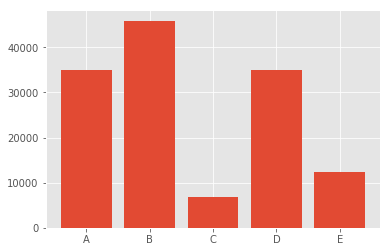

In [15]:
A = Total.RELACIONADAS_CON_LAS_PERSONAS.sum()
B = Total.RELACIONADAS_CON_EL_PATRIMONIO.sum()
C = Total.POR_TENENCIA_DE_ARMAS.sum()
D = Total.POR_TENENCIA_DE_DROGAS.sum()
E = Total.POR_CONSUMO_DE_DROGAS.sum()

X = ["A","B","C","D","E"]
Y = [A, B, C, D, E]

plt.bar(X, Y)


We can see that the main crime this 4 years has been the thefts (RELACIONADAS_CON_EL_PATRIMONIO)
Now, I'm going to show the relation in time...

Text(0.5,0,'Dates')

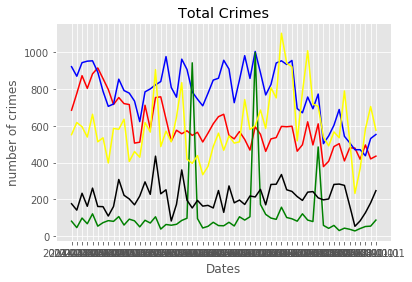

In [16]:
X = Total.fecha

A = Total.RELACIONADAS_CON_LAS_PERSONAS
B = Total.RELACIONADAS_CON_EL_PATRIMONIO
C = Total.POR_TENENCIA_DE_ARMAS
D = Total.POR_TENENCIA_DE_DROGAS
E = Total.POR_CONSUMO_DE_DROGAS

plt.plot(X, A, color = 'red')
plt.plot(X, B, color = 'blue')
plt.plot(X, C, color = 'green')
plt.plot(X, D, color = 'yellow')
plt.plot(X, E, color = 'black')

plt.title('Total Crimes')
plt.ylabel('number of crimes')
plt.xlabel('Dates')



We can notice that some of them are decresing, as related to people crimes... but others are not so clear.
There are supposed to be any association, I guess, so, I'm going to get the correlation, to get if there is any relation between variables...
Another point is about weapons... It seems that there were 3 police raids...

In [17]:
correlations = Total.corr()
correlations

,RELACIONADAS_CON_LAS_PERSONAS,RELACIONADAS_CON_EL_PATRIMONIO,POR_TENENCIA_DE_ARMAS,POR_TENENCIA_DE_DROGAS,POR_CONSUMO_DE_DROGAS
RELACIONADAS_CON_LAS_PERSONAS,1.000000,0.563886,0.004365,0.036097,0.086604
RELACIONADAS_CON_EL_PATRIMONIO,0.563886,1.000000,0.220433,0.315327,0.319424
POR_TENENCIA_DE_ARMAS,0.004365,0.220433,1.000000,0.012445,-0.000988
POR_TENENCIA_DE_DROGAS,0.036097,0.315327,0.012445,1.000000,0.637973
POR_CONSUMO_DE_DROGAS,0.086604,0.319424,-0.000988,0.637973,1.000000


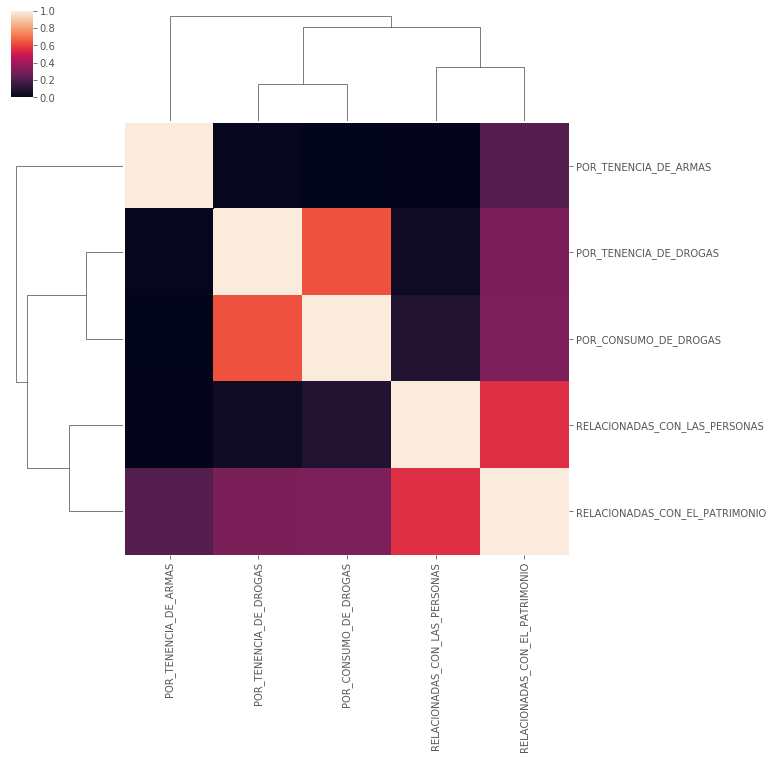

In [18]:
sns.clustermap(correlations)

We can guess that there is kind a relation between having drugs and consum them (63%)... So, I am going to analyse these specifict Data.
There are also a kind of association between people crimes, and patrimonies crimes,(56%), but drugs are matching stronger...
I show you in two ways:

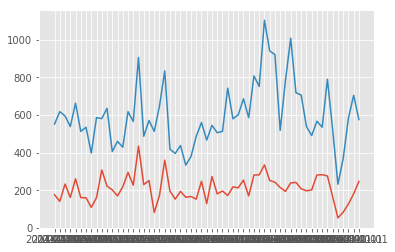

In [19]:
X = Total.fecha
C = Total.POR_CONSUMO_DE_DROGAS
D = Total.POR_TENENCIA_DE_DROGAS
plt.plot(X, C)
plt.plot(X, D)

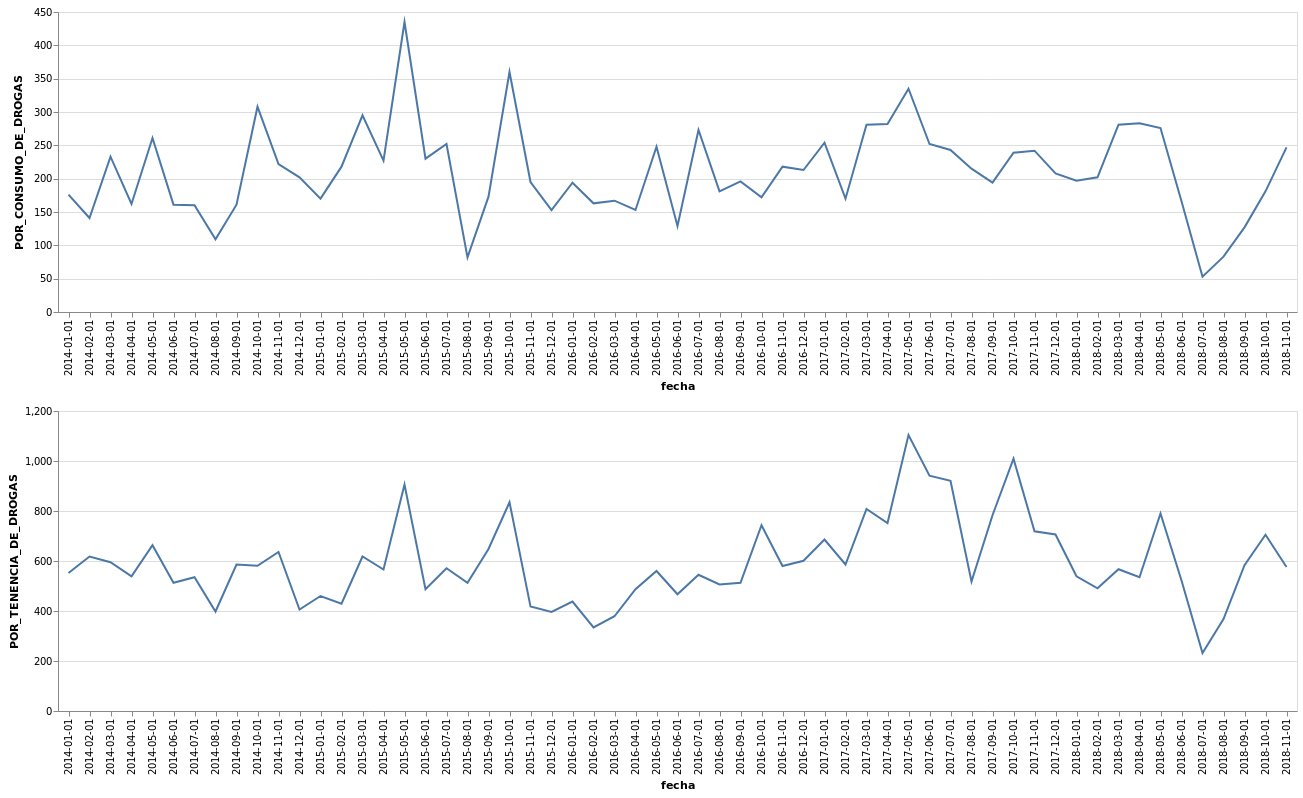

In [20]:
Consumo = alt.Chart(Total).mark_line().encode(
x = "fecha",
    y = "POR_CONSUMO_DE_DROGAS"
)

Tenencia = alt.Chart(Total).mark_line().encode(
    x="fecha",
    y="POR_TENENCIA_DE_DROGAS"
)
Consumo&Tenencia

We can see clearly that there is a relation between these two variables... when having drugs is increasing, the Drugs Consumption also increases.
Now we have the conviction, I will show the relation in the Districts...

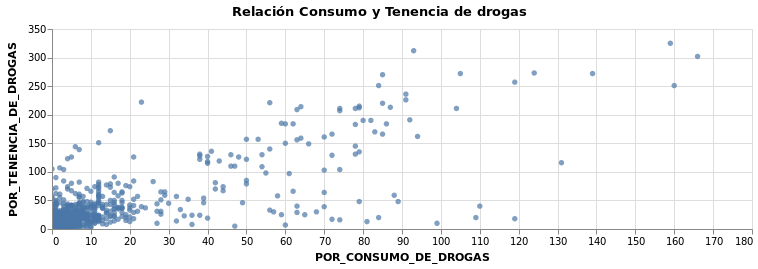

In [21]:
scatter = alt.Chart(Distritos).mark_circle().encode(
    x="POR_CONSUMO_DE_DROGAS",
    y="POR_TENENCIA_DE_DROGAS"
).interactive().properties(
    width=700,
    height=200,
    title="Relación Consumo y Tenencia de drogas"
)
scatter

I will get the Data in Districts and follow the time stamp, to show if there is any association...

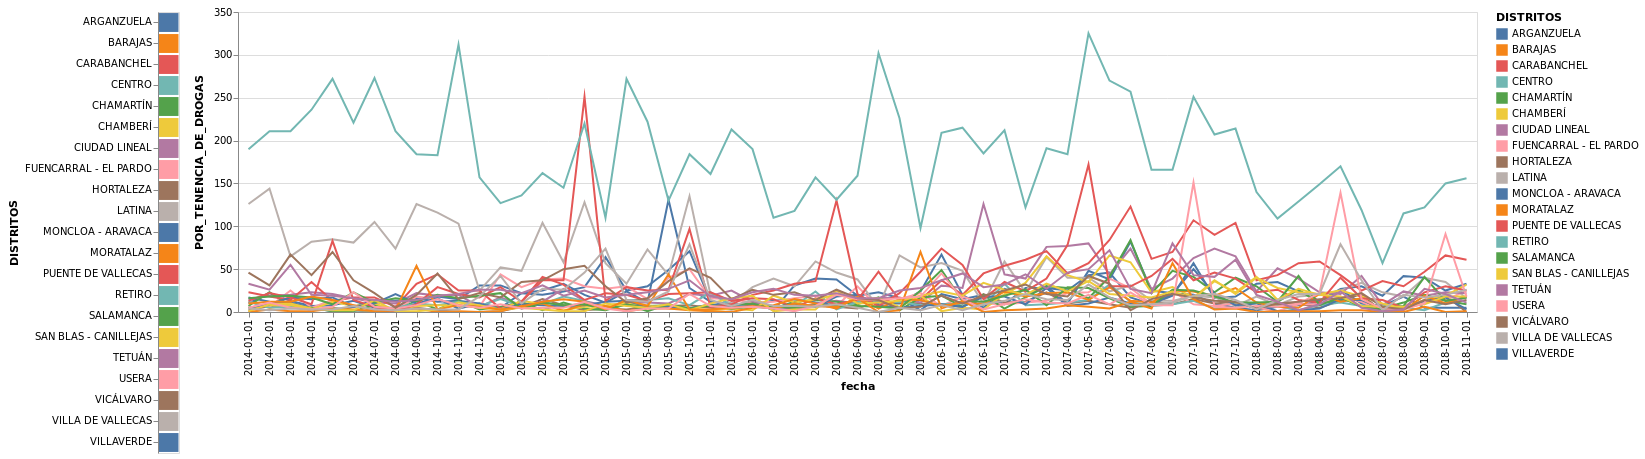

In [22]:
select_search_term = alt.selection_single(encodings=["color"])

line=alt.Chart(Distritos).mark_line().encode(
    x="fecha",
    y="POR_TENENCIA_DE_DROGAS",
    color="DISTRITOS"
    
).transform_filter(
select_search_term.ref())
line

comp=alt.Chart(Distritos).mark_bar().encode(
    y="DISTRITOS",
    color="DISTRITOS",
    tooltip="sum(POR_TENENCIA_DE_DROGAS)"
).properties(
selection=select_search_term)

comp|line

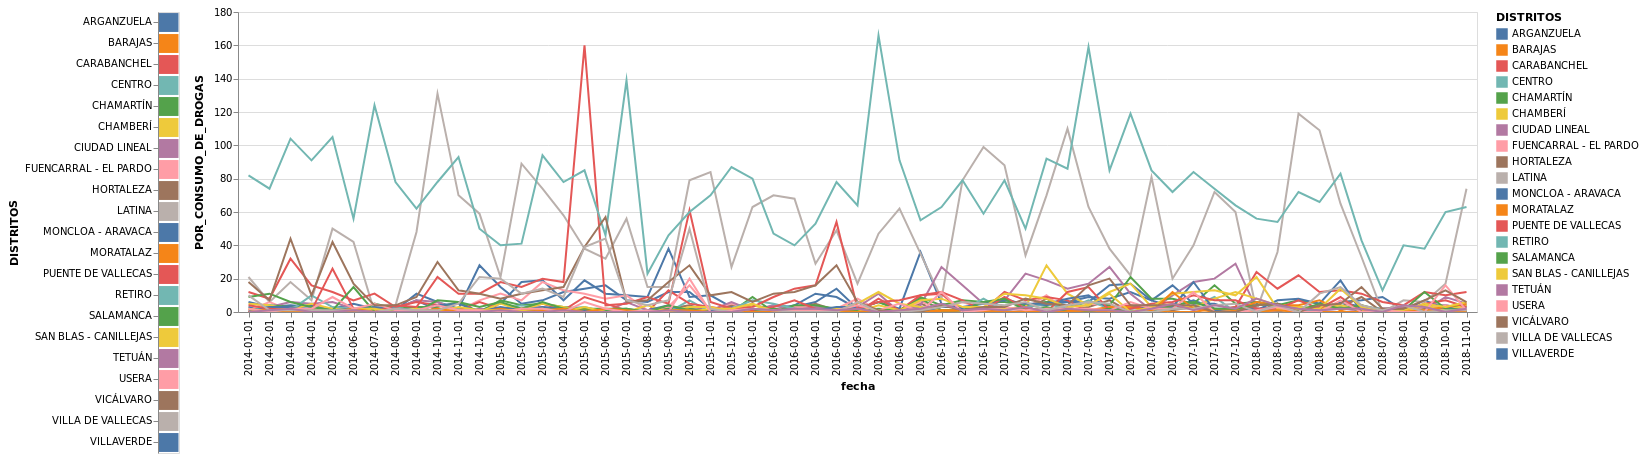

In [23]:
select_search_term = alt.selection_single(encodings=["color"])

line=alt.Chart(Distritos).mark_line().encode(
    x="fecha",
    y="POR_CONSUMO_DE_DROGAS",
    color="DISTRITOS"
    
).transform_filter(
select_search_term.ref())
line

comp=alt.Chart(Distritos).mark_bar().encode(
    y="DISTRITOS",
    color="DISTRITOS",
    tooltip="sum(POR_CONSUMO_DE_DROGAS)"
).properties(
selection=select_search_term)

comp|line

If We try to get some information with this kind of graphics, We have problems, because it is not easy to appreciate every District from another. The posibility that the Altair Libray offers us is to choose every District one by one, just by cliking in the left table, which contens the Districts.

Using seaborn libray, we can simulate a linear regression... If We use the "Total" dataframe, it is easy to understand, but, if We try to show it with all the Districts, the result is incomprehensible.

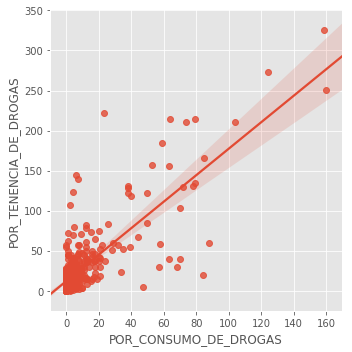

In [24]:
sns.lmplot(data=Distritos.sample(500), x='POR_CONSUMO_DE_DROGAS',y='POR_TENENCIA_DE_DROGAS')

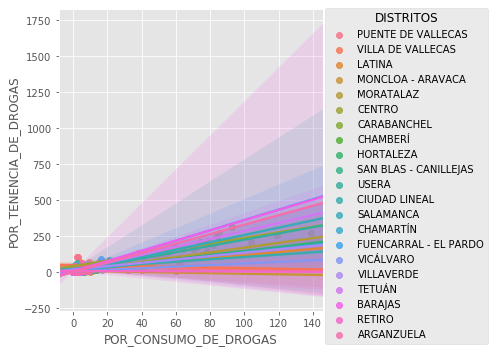

In [25]:
sns.lmplot(data=Distritos.sample(500), x='POR_CONSUMO_DE_DROGAS',y='POR_TENENCIA_DE_DROGAS', hue='DISTRITOS')

So, to detect the nearest association, and the worse one, I'm afraid we should make the correlation exercise with every District, and study them apart.

In [26]:
Distritos['DISTRITOS'].unique()

array(['ARGANZUELA', 'VILLAVERDE', 'VILLA DE VALLECAS', 'VICÁLVARO',
       'USERA', 'TETUÁN', 'SALAMANCA', 'RETIRO', 'PUENTE DE VALLECAS',
       'SAN BLAS - CANILLEJAS', 'MONCLOA - ARAVACA', 'MORATALAZ',
       'CARABANCHEL', 'CENTRO', 'CHAMARTÍN', 'CHAMBERÍ', 'BARAJAS',
       'FUENCARRAL - EL PARDO', 'HORTALEZA', 'LATINA', 'CIUDAD LINEAL'],
      dtype=object)

In [27]:
dfTest = District(Distritos,'CARABANCHEL')
dfTest.corr()
# We get 79% correlation in CENTRO
# We get 43% correlation in BARAJAS
# We get 74% correlation in SAN BLAS - CANILLEJAS
# We get 59% correlation in VICÁLVARO
# We get 8%  correlation in VILLA DE VALLECAS
# We get 73% correlation in HORTALEZA
# We get 21% correlation in CIUDAD LINEAL
# We get 25% correlation in MORATALAZ
# We get 0,6% correlation in PUENTE DE VALLECAS
# We get 25% correlation in VILLAVERDE
# We get 82% correlation in CARABANCHEL
# We get 69% correlation in USERA
# We get 21% correlation in RETIRO
# We get 67% correlation in SALAMANCA
# We get 35% correlation in CHAMARTÍN
# We get 56% correlation in TETUÁN
# We get 60% correlation in ARGANZUELA
# We get 57% correlation in FUENCARRAL - EL PARDO
# We get 42% correlation in MONCLOA - ARAVACA
# We get 80% correlation in LATINA
# We get 67% correlation in CHAMBERÍ

,RELACIONADAS_CON_LAS_PERSONAS,RELACIONADAS_CON_EL_PATRIMONIO,POR_TENENCIA_DE_ARMAS,POR_TENENCIA_DE_DROGAS,POR_CONSUMO_DE_DROGAS
RELACIONADAS_CON_LAS_PERSONAS,1.000000,0.738411,0.135090,-0.050425,0.052053
RELACIONADAS_CON_EL_PATRIMONIO,0.738411,1.000000,0.181939,0.012557,0.089488
POR_TENENCIA_DE_ARMAS,0.135090,0.181939,1.000000,0.576692,0.307521
POR_TENENCIA_DE_DROGAS,-0.050425,0.012557,0.576692,1.000000,0.828236
POR_CONSUMO_DE_DROGAS,0.052053,0.089488,0.307521,0.828236,1.000000


We cannot make an linear regression because we do not have enough Data... But, using other apps, like Tableau, we can se if there is any geographic association... Let's go to have a look in Tableau after getting some information...

In [28]:
Distritos.POR_CONSUMO_DE_DROGAS.max()

166

In [29]:
Distritos.POR_CONSUMO_DE_DROGAS.min()

0

In [30]:
Distritos.POR_TENENCIA_DE_DROGAS.max()

325

In [31]:
Distritos.POR_TENENCIA_DE_DROGAS.min()

0

By the way, every Christmas time, the weapons crimes are increased... Police Raid are supposed to come in Christmas time, in order to be sure that the crodwed Center of the city is a safe area...
The second graphic shows the Districts... please notice that 'CENTRO' has this special form...

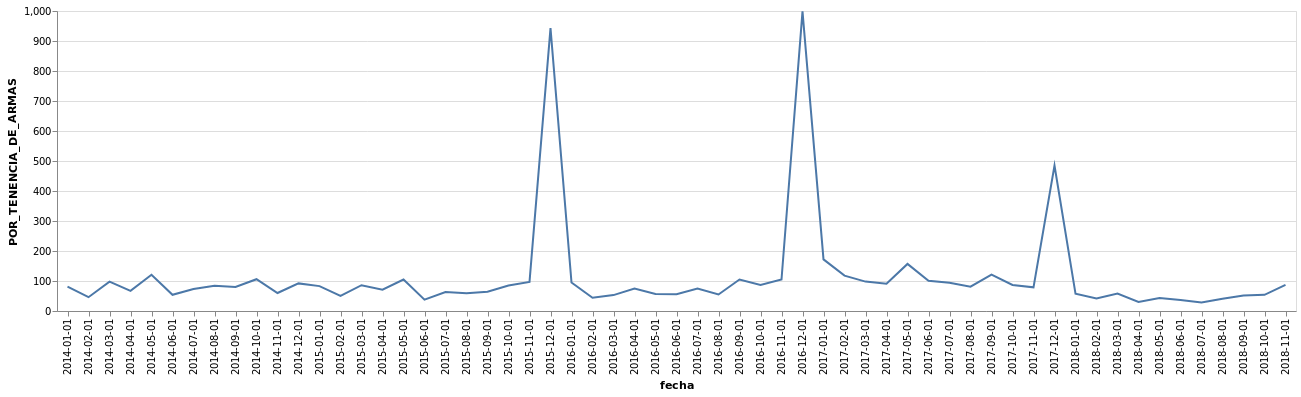

In [32]:
Redada = alt.Chart(Total).mark_line().encode(
x = "fecha",
    y = "POR_TENENCIA_DE_ARMAS"
)
Redada

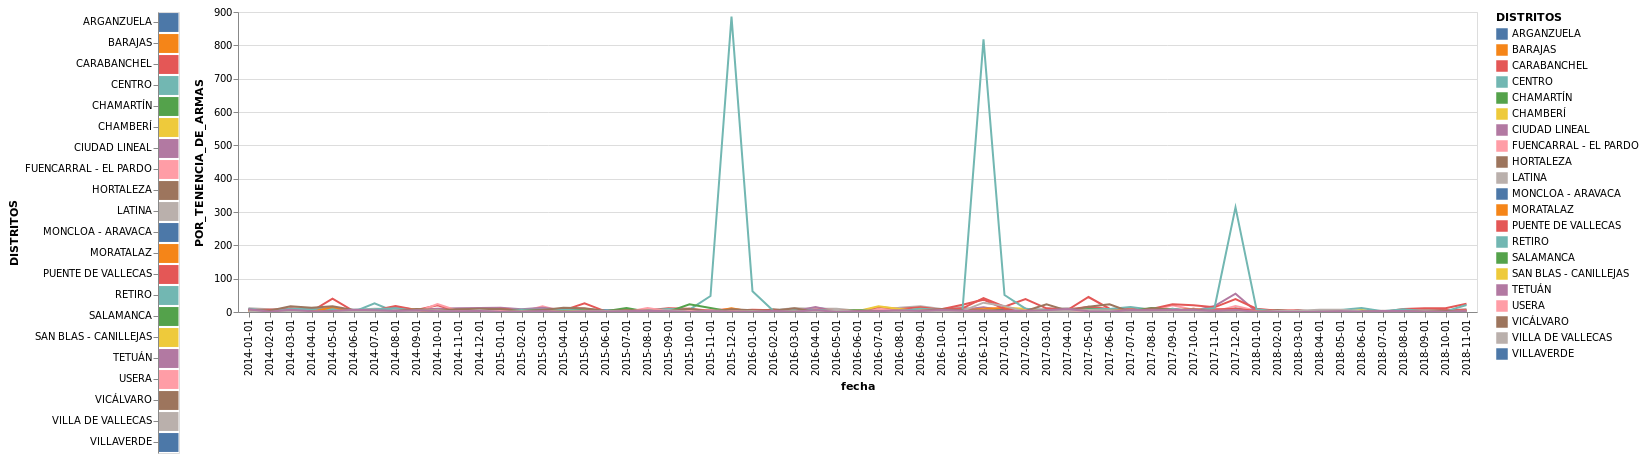

In [34]:
select_search_term = alt.selection_single(encodings=["color"])

line=alt.Chart(Distritos).mark_line().encode(
    x="fecha",
    y="POR_TENENCIA_DE_ARMAS",
    color="DISTRITOS"
    
).transform_filter(
select_search_term.ref())
line

comp=alt.Chart(Distritos).mark_bar().encode(
    y="DISTRITOS",
    color="DISTRITOS",
    tooltip="sum(POR_TENENCIA_DE_ARMAS)"
).properties(
selection=select_search_term)

comp|line